# ADS500B - Data Science Programming
## Group 3
### Authors:
Marriott, Bobby; Matrinez, Patricio; Widjaja, Victoria (Tori)

#### Introduction
In this report, we aim to investigate which housing features impact house prices in Washington State. Our ultimate goal is to present our clients with valuable insights to help them make informed decisions. By thoroughly analyzing a broad range of housing features, we have identified specific characteristics that offer the highest potential for our clients to maximize their profits, which can assist them in recognizing the most lucrative investment opportunities on the market.

# 1. Data Importing and Pre-processing

## 1.1 Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used

In [1]:
###import packages###
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, MaxNLocator
import seaborn as sns
from IPython.display import display, HTML
from scipy.stats import trim_mean
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    explained_variance_score,
)
from sklearn.tree import plot_tree

###removing scientific notation###
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
###Connection info for GitHub File###
url = 'https://github.com/TexasTori/ADS500B/raw/23fed13154371851d00cb375e177636726bf8bc2/house_sales.csv'
df_orig = pd.read_csv(url, sep=',')

###set up to automate files print location for team###
cwd = os.getcwd() 
log_prefix = os.path.join(cwd,'log_files')
print(log_prefix)

C:\Users\Widjaja\ADS500B\log_files


The filetype is csv and the import method was through Pandas.

The initial dataset comprises 21 columns and 21,613 records, encompassing integers, objects, and floats. Notably, there are missing values in the bedrooms, bathrooms, sqft_living, and sqft_lot columns. The Price column exhibits a wide range, spanning from 75,000 to 7.7 million dollars.

Upon a comprehensive review of the dataset's general information, we pinpointed specific areas that required cleaning and handling:

1. __Fixing the 'Date' Column:__
We addressed the 'Date' column by removing the 'T000000' and converting it to the appropriate date format.

2. __Removing Records with 0 Bedrooms or Bathrooms:__
We excluded records where the assigned number of bedrooms or bathrooms was zero.

3. __Data Trimming:__
To narrow our focus and align with the project's scope, we trimmed the data by excluding the top and bottom 1%, effectively eliminating low-end homes and extreme luxury homes outside our area of interest.

4. __Handling Missing Values:__
For columns such as 'Bedrooms,' 'Bathrooms,' 'Sqft_living,' and 'Sqft_lot' with missing values, we adopted a strategy of population by averages based on pricing groups.

This systematic approach allowed us to comprehensively address the dataset's cleanliness and integrity, ensuring that it aligns with our analytical goals and the defined scope of the project.

In [3]:
###view file sample###
df_orig.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3.00,1.00,1180.00,5650.00,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3.00,2.25,2570.00,7242.00,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2.00,1.00,770.00,10000.00,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4.00,3.00,1960.00,5000.00,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3.00,2.00,1680.00,8080.00,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [4]:
###Printing out the rows and columns of the dataset to highlight the dimensions###
display(HTML("<u>Dimensions:</u>"))
print(df_orig.shape)

(21613, 21)


In [5]:
###The datatypes of each column are found using dtypes()###
display(HTML("<u>Data Types:</u>"))
print(df_orig.dtypes)

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [6]:
###Null values count###
null_data = df_orig.isnull().sum()
display(HTML("<u>Null Data Counts:</u>"))
print(null_data)

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [7]:
### Pricing stats ###
display(HTML("<u>Price Details:</u>"))
df_orig['price'].describe().apply(lambda x: format(round(x,2), '.2f'))

count      21613.00
mean      540088.14
std       367127.20
min        75000.00
25%       321950.00
50%       450000.00
75%       645000.00
max      7700000.00
Name: price, dtype: object

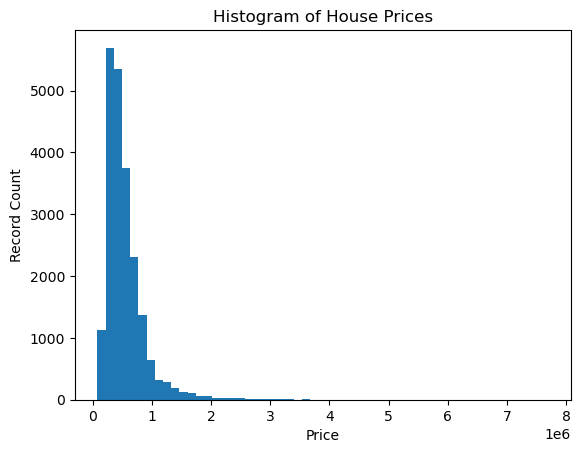

In [8]:
### Histogram ###
plt.hist(df_orig['price'], bins = 55)
plt.title('Histogram of House Prices')
plt.xlabel('Price')
plt.ylabel('Record Count')

### Print out ###
plt.show()


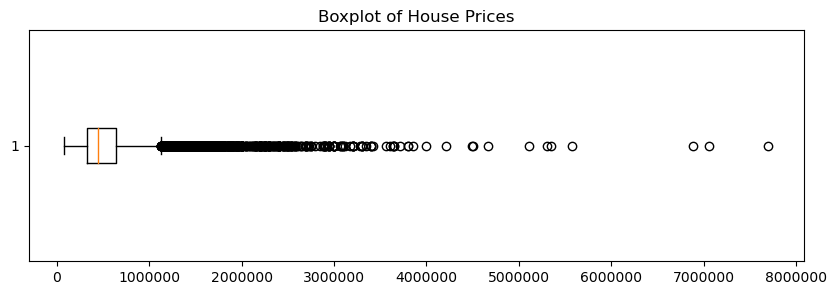

In [9]:
### Boxplot ###
fig, ax = plt.subplots(figsize=(10, 3))
ax.boxplot(df_orig['price'], vert=False)
ax.ticklabel_format(style='plain', axis='x')
ax.set_title('Boxplot of House Prices')

### Print out ###
plt.show()

## 1.2 Clean, Wrangle and Handle Missing Data Step

In [10]:
### BOBBY ###

### working copy ###
date_time_cleaned = df_orig.copy()

### Fixing date format###
date_time_cleaned['date'] = pd.to_datetime(df_orig['date'], format='%Y%m%dT%H%M%S', errors='coerce')

### Save the updated DataFrame to a new CSV file ###
date_time_cleaned.to_csv(os.path.join(log_prefix, "house_file_v2.csv"), index=False)

### sample of the cleaned data ###
display(HTML("<u>Sample of Cleaned Data:</u>"))
print(date_time_cleaned.head())

           id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13 221900.00      3.00       1.00      1180.00   
1  6414100192 2014-12-09 538000.00      3.00       2.25      2570.00   
2  5631500400 2015-02-25 180000.00      2.00       1.00       770.00   
3  2487200875 2014-12-09 604000.00      4.00       3.00      1960.00   
4  1954400510 2015-02-18 510000.00      3.00       2.00      1680.00   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0   5650.00    1.00           0     0  ...      7        1180              0   
1   7242.00    2.00           0     0  ...      7        2170            400   
2  10000.00    1.00           0     0  ...      6         770              0   
3   5000.00    1.00           0     0  ...      7        1050            910   
4   8080.00    1.00           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  
0      1

In [11]:
### Filtering and saving the data ###
date_time_cleaned = date_time_cleaned[(date_time_cleaned['bedrooms'] != 0) & (date_time_cleaned['bathrooms'] != 0)]

date_time_cleaned.to_csv(os.path.join(log_prefix, 'filtered_date_time_cleaned.csv'), index=False)

In [12]:
### Checking progress ###
date_time_cleaned.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3.00,1.00,1180.00,5650.00,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000.00,3.00,2.25,2570.00,7242.00,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000.00,2.00,1.00,770.00,10000.00,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4.00,3.00,1960.00,5000.00,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3.00,2.00,1680.00,8080.00,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [13]:
### Removing the top and bottom 1% of data in the price column ###
working_data = pd.read_csv(os.path.join(log_prefix, 'filtered_date_time_cleaned.csv'))

### Establishing lower and upper bound using the bottom and upper 1% ##
upper_bound = working_data['price'].quantile(0.99)
lower_bound = working_data['price'].quantile(0.01)

display(HTML("<u>Defining Bounds to Remove Outliers:</u>"))
print("Upper bound =",round(upper_bound,2))
print("\nLower bound =",round(lower_bound,2))

### Only extracting the data in between the values above the lower bound and values lower than the upper bound ###
working_data2 = working_data[(working_data['price'] >= lower_bound) & (working_data['price'] <= upper_bound)]

Upper bound = 1965006.6

Lower bound = 154000.0


In [14]:
### Print Out summary of changes ###
record_start = "Record Start Total:".ljust(25)
num_dropped = "# of Records Dropped:".ljust(25)
record_end = "Record End Total:".ljust(25)

print(f"\n{record_start}{df_orig.shape[0]}")
print(f"{num_dropped}{len(df_orig) - len(working_data2)}")
print(f"{record_end}{working_data2.shape[0]}")

### Save copy of file to logs ###
working_data2.to_csv(os.path.join(log_prefix, "filtered_price_cleaned.csv"), index=False)



Record Start Total:      21613
# of Records Dropped:    446
Record End Total:        21167


Describing the new dataframe with lower counts again as well as a new mean of 522,238 instead of the previous 540,200. We are now ready to handle the missing data. 

In [15]:
### Print out ###
display(HTML("<u>Price Details:</u>"))
working_data2['price'].describe().apply(lambda x: format(round(x, 2), '.2f'))

count      21167.00
mean      522238.23
std       283392.31
min       154000.00
25%       325000.00
50%       450000.00
75%       639000.00
max      1965000.00
Name: price, dtype: object

In [16]:
### TORI ###

### New df for handling missing data ###
df_clean = working_data2.copy() 

### Create bins for the 'price' column with 4 groups ###
price_bins, bin_edges = pd.qcut(df_clean['price'], q=4, labels=False, retbins=True)
df_clean['price_group'] = price_bins

### Display the ranges for each bin & Check the distribution of the groups ###
display(HTML("<u>Bin Ranges:</u>"))
for i in range(len(bin_edges) - 1):
    start, end = bin_edges[i], bin_edges[i + 1]
    start, end = round(start, 2), round(end, 2)
    print(f"Bin {i + 1} Range: ({start}, {end}]")

### Distributions ###
display(HTML("<u>Group Distribution Total Records:</u>"))
print(df_clean['price_group'].value_counts().sort_index(ascending=True))

df_clean.to_csv(os.path.join(log_prefix, 'house_file_v2_grouped.csv'), index=False)

Bin 1 Range: (154000.0, 325000.0]
Bin 2 Range: (325000.0, 450000.0]
Bin 3 Range: (450000.0, 639000.0]
Bin 4 Range: (639000.0, 1965000.0]


0    5410
1    5226
2    5247
3    5284
Name: price_group, dtype: int64


In [17]:
### Average 'bedrooms' per bin ###
avg_bedrooms_bin = round(df_clean.groupby('price_group')['bedrooms'].mean(),0)
df_clean['avg_bedrooms'] = df_clean.groupby('price_group')['bedrooms'].transform('mean').round(0)

### Print out average bedrooms per bin###
display(HTML("<u>Average Bedrooms per Bin:</u>"))
print(avg_bedrooms_bin)

### Replace NaN values in 'bedrooms' with values from 'avg_bedrooms' ###
df_clean['bedrooms'] = df_clean['bedrooms'].fillna(df_clean['avg_bedrooms'])


price_group
0   3.00
1   3.00
2   3.00
3   4.00
Name: bedrooms, dtype: float64


In [18]:
### Average 'bathrooms' per bin ###
avg_bathrooms_bin = round(df_clean.groupby('price_group')['bathrooms'].mean(),0)
df_clean['avg_bathrooms'] = df_clean.groupby('price_group')['bathrooms'].transform('mean').round(0)

### Print out average bbathroom per bin ###
display(HTML("<u>Average Bathrooms per Bin:</u>"))
print(avg_bathrooms_bin)

### Replace NaN values in 'bathrooms' with values from 'avg_bathrooms' ###
df_clean['bathrooms'] = df_clean['bathrooms'].fillna(df_clean['avg_bathrooms'])


price_group
0   2.00
1   2.00
2   2.00
3   3.00
Name: bathrooms, dtype: float64


In [19]:
### Average 'SQFT' per bin ###
avg_sqft_living_bin = round(df_clean.groupby('price_group')['sqft_living'].mean(),0)
df_clean['avg_sqft_living'] = df_clean.groupby('price_group')['sqft_living'].transform('mean').round(0)

### Print out average SQFT per bin ###
display(HTML("<u>Average SQFT Living per Bin:</u>"))
print(avg_sqft_living_bin)

### Replace NaN values in 'SQFT' with values from 'avg_sqft_living_bin' ###
df_clean['sqft_living'] = df_clean['sqft_living'].fillna(df_clean['avg_sqft_living'])


price_group
0   1497.00
1   1785.00
2   2079.00
3   2902.00
Name: sqft_living, dtype: float64


In [20]:
### Average 'sqft_lot' per bin ###
avg_sqft_lot_bin = round(df_clean.groupby('price_group')['sqft_lot'].mean(),0)
df_clean['avg_sqft_lot'] = df_clean.groupby('price_group')['sqft_lot'].transform('mean').round(0)

### Print out average sqft_lot per bin ###
display(HTML("<u>Average SQFT Lot per Bin:</u>"))
print(avg_sqft_lot_bin)

### Replace NaN values in 'sqft_lot' with values from 'avg_sqft_lot' ###
df_clean['sqft_lot'] = df_clean['sqft_lot'].fillna(df_clean['avg_sqft_lot'])

price_group
0   10435.00
1   13030.00
2   16044.00
3   20974.00
Name: sqft_lot, dtype: float64


In [21]:
### Check all Null values have been handled ###
null_data = df_clean.isnull().sum()
display(HTML("<u>Null Data Counts:</u>"))
print(null_data)

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
price_group        0
avg_bedrooms       0
avg_bathrooms      0
avg_sqft_living    0
avg_sqft_lot       0
dtype: int64


In [22]:
### Save progress ###
df_clean.to_csv(os.path.join(log_prefix, 'house_file_v2_grouped.csv'), index=False)
                
### Check Progress ###
df_clean.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,price_group,avg_bedrooms,avg_bathrooms,avg_sqft_living,avg_sqft_lot
0,7129300520,2014-10-13,221900.00,3.00,1.00,1180.00,5650.00,1.00,0,0,...,98178,47.51,-122.26,1340,5650,0,3.00,2.00,1497.00,10435.00
1,6414100192,2014-12-09,538000.00,3.00,2.25,2570.00,7242.00,2.00,0,0,...,98125,47.72,-122.32,1690,7639,2,3.00,2.00,2079.00,16044.00
2,5631500400,2015-02-25,180000.00,2.00,1.00,770.00,10000.00,1.00,0,0,...,98028,47.74,-122.23,2720,8062,0,3.00,2.00,1497.00,10435.00
3,2487200875,2014-12-09,604000.00,4.00,3.00,1960.00,5000.00,1.00,0,0,...,98136,47.52,-122.39,1360,5000,2,3.00,2.00,2079.00,16044.00
4,1954400510,2015-02-18,510000.00,3.00,2.00,1680.00,8080.00,1.00,0,0,...,98074,47.62,-122.05,1800,7503,2,3.00,2.00,2079.00,16044.00


## 1.3 Transform data appropriately using techniques such as aggregation, normalization, and feature construction

In [23]:
### Patricio ###

df_working = df_clean.copy() ##pd.read_csv(os.path.join(log_prefix, 'house_file_v2_grouped.csv'))

### New column 'price per square foot' ###
df_working['price_per_sqft'] = df_working['price'] / df_working['sqft_living']

### Normalize the 'price_per_sqft' column ###
price_per_sqft_mean = df_working['price_per_sqft'].mean()
price_per_sqft_std = df_working['price_per_sqft'].std()
df_working['price_per_sqft_normalized'] = (df_working['price_per_sqft'] - price_per_sqft_mean) / price_per_sqft_std

### Calculate the average 'price per square foot' for each zipcode ###
avg_price_per_sqft = df_working.groupby('zipcode')['price_per_sqft'].mean().reset_index(name='avg_price_per_sqft')
df_working = pd.merge(df_working, avg_price_per_sqft, on='zipcode', how='left')

### Convert 'condition' column into categorical data ###
df_working['condition'] = df_working['condition'].astype('category')

### Convert 'yr_built' to age ###
current_year = 2015
df_working['age'] = current_year - df_working['yr_built']

### Change '33' bedrooms to '3' ###
df_working.loc[df_working['bedrooms'] == 33, 'bedrooms'] = 3

### Sample of the cleaned data ###
display(HTML("<u>Sample of Cleaned Data:</u>"))
df_working.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,price_group,avg_bedrooms,avg_bathrooms,avg_sqft_living,avg_sqft_lot,price_per_sqft,price_per_sqft_normalized,avg_price_per_sqft,age
0,7129300520,2014-10-13,221900.00,3.00,1.00,1180.00,5650.00,1.00,0,0,...,5650,0,3.00,2.00,1497.00,10435.00,188.05,-0.70,190.97,60
1,6414100192,2014-12-09,538000.00,3.00,2.25,2570.00,7242.00,2.00,0,0,...,7639,2,3.00,2.00,2079.00,16044.00,209.34,-0.50,280.17,64
2,5631500400,2015-02-25,180000.00,2.00,1.00,770.00,10000.00,1.00,0,0,...,8062,0,3.00,2.00,1497.00,10435.00,233.77,-0.26,225.08,82
3,2487200875,2014-12-09,604000.00,4.00,3.00,1960.00,5000.00,1.00,0,0,...,5000,2,3.00,2.00,2079.00,16044.00,308.16,0.45,334.52,50
4,1954400510,2015-02-18,510000.00,3.00,2.00,1680.00,8080.00,1.00,0,0,...,7503,2,3.00,2.00,2079.00,16044.00,303.57,0.41,264.16,28


## 1.4 Reduce redundant data and perform need-based discretization

In [24]:
display(HTML("<u>Number of Duplicated ids:</u>"))
print(df_working.duplicated(subset=['id']).sum(),"\n")

### Removing duplicates ###
df_working.drop_duplicates(subset=['id']) 

### drop the columns 'long', and 'lat' ### 
df_working.drop(['long', 'lat', 'avg_bedrooms', 'avg_bathrooms', 
                 'avg_sqft_living', 'avg_sqft_lot'], axis=1, inplace=True)

152 



In [25]:
### Using the bin-edges from the handling section to create categories ###
price_labels = ['low', 'medium', 'high', 'luxury']
df_working['price_category'] = pd.cut(df_working['price'], bins=bin_edges, labels=price_labels, include_lowest=True)

### Save the transformed DataFrame ###
df_working.to_csv(os.path.join(log_prefix,'house_file_v2_cleaned.csv'), index=False)

### Display the first few rows to verify changes ###
df_working.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,sqft_living15,sqft_lot15,price_group,price_per_sqft,price_per_sqft_normalized,avg_price_per_sqft,age,price_category
0,7129300520,2014-10-13,221900.00,3.00,1.00,1180.00,5650.00,1.00,0,0,...,0,98178,1340,5650,0,188.05,-0.70,190.97,60,low
1,6414100192,2014-12-09,538000.00,3.00,2.25,2570.00,7242.00,2.00,0,0,...,1991,98125,1690,7639,2,209.34,-0.50,280.17,64,high
2,5631500400,2015-02-25,180000.00,2.00,1.00,770.00,10000.00,1.00,0,0,...,0,98028,2720,8062,0,233.77,-0.26,225.08,82,low
3,2487200875,2014-12-09,604000.00,4.00,3.00,1960.00,5000.00,1.00,0,0,...,0,98136,1360,5000,2,308.16,0.45,334.52,50,high
4,1954400510,2015-02-18,510000.00,3.00,2.00,1680.00,8080.00,1.00,0,0,...,0,98074,1800,7503,2,303.57,0.41,264.16,28,high


# 2. Data Analysis and Visualization
## 2.1 Identify categorical, ordinal, and numerical variables within the data

In [26]:
###Patricio###

### Display column names ###
print(df_working.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'price_group', 'price_per_sqft',
       'price_per_sqft_normalized', 'avg_price_per_sqft', 'age',
       'price_category'],
      dtype='object')


In [27]:
### Set columns as per their types ###
df_working['grade'] = df_working['grade'].astype('category')
df_working['waterfront'] = df_working['waterfront'].astype('category')
df_working['zipcode'] = df_working['zipcode'].astype('int64')
df_working['bedrooms'] = pd.to_numeric(df_working['bedrooms'], errors='coerce')  
df_working['price'] = pd.to_numeric(df_working['price'], errors='coerce')  
df_working['view'] = pd.to_numeric(df_working['view'], errors='coerce')  

### Check the data types have been set correctly ###
display(HTML("<u>Data Types:</u>"))
print(df_working.dtypes)


id                              int64
date                           object
price                         float64
bedrooms                      float64
bathrooms                     float64
sqft_living                   float64
sqft_lot                      float64
floors                        float64
waterfront                   category
view                            int64
condition                    category
grade                        category
sqft_above                      int64
sqft_basement                   int64
yr_built                        int64
yr_renovated                    int64
zipcode                         int64
sqft_living15                   int64
sqft_lot15                      int64
price_group                     int64
price_per_sqft                float64
price_per_sqft_normalized     float64
avg_price_per_sqft            float64
age                             int64
price_category               category
dtype: object


In [28]:
### Setting Final Data Frame for Vizualizations ###
df_final = df_working.copy()

df_final.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,sqft_living15,sqft_lot15,price_group,price_per_sqft,price_per_sqft_normalized,avg_price_per_sqft,age,price_category
0,7129300520,2014-10-13,221900.00,3.00,1.00,1180.00,5650.00,1.00,0,0,...,0,98178,1340,5650,0,188.05,-0.70,190.97,60,low
1,6414100192,2014-12-09,538000.00,3.00,2.25,2570.00,7242.00,2.00,0,0,...,1991,98125,1690,7639,2,209.34,-0.50,280.17,64,high
2,5631500400,2015-02-25,180000.00,2.00,1.00,770.00,10000.00,1.00,0,0,...,0,98028,2720,8062,0,233.77,-0.26,225.08,82,low
3,2487200875,2014-12-09,604000.00,4.00,3.00,1960.00,5000.00,1.00,0,0,...,0,98136,1360,5000,2,308.16,0.45,334.52,50,high
4,1954400510,2015-02-18,510000.00,3.00,2.00,1680.00,8080.00,1.00,0,0,...,0,98074,1800,7503,2,303.57,0.41,264.16,28,high


## 2.2 Provide measures of centrality and distribution with visualizations

In [29]:
### measures of centrality ###
display(HTML("<u>Measures of Centrality:</u>"))
print(df_working.describe())

                 id      price  bedrooms  bathrooms  sqft_living   sqft_lot  \
count      21167.00   21167.00  21167.00   21167.00     21167.00   21167.00   
mean  4591219330.48  522238.23      3.37       2.12      2063.00   15097.02   
std   2878380465.37  283392.31      0.88       0.73       845.22   40178.67   
min      1000102.00  154000.00      1.00       0.50       370.00     520.00   
25%   2125729621.00  325000.00      3.00       1.75      1460.00    5110.00   
50%   3905030480.00  450000.00      3.00       2.25      1920.00    7800.00   
75%   7333150180.00  639000.00      4.00       2.50      2530.00   11250.00   
max   9900000190.00 1965000.00     10.00       7.50      7730.00 1651359.00   

        floors     view  sqft_above  sqft_basement  yr_built  yr_renovated  \
count 21167.00 21167.00    21167.00       21167.00  21167.00      21167.00   
mean      1.49     0.22     1774.75         287.18   1971.20         82.60   
std       0.54     0.73      790.64         431.74    

The first visualization, a histogram, revealed the general distribution of housing prices. It displayed a right skew pattern, indicating most houses are clustered in a lower price range with fewer in the higher range. This skew represents a typical market trend nationwide, showing that the majority of houses fall under the price range indicated by this skew. 

Text(0.5, 1.0, 'Histogram of House Prices')

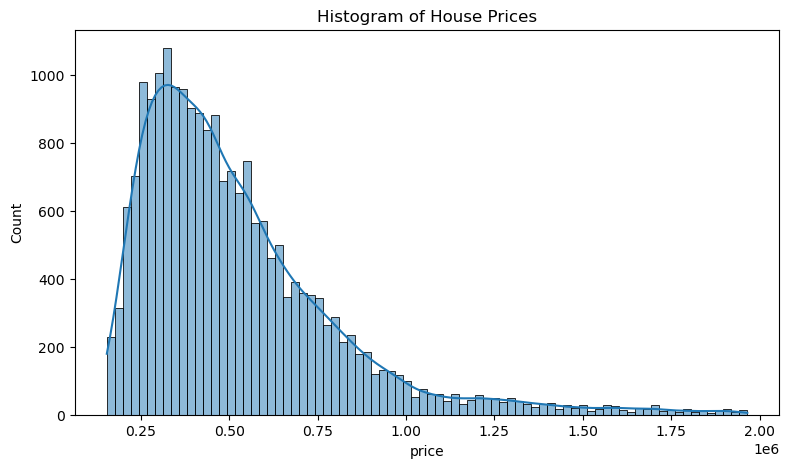

In [30]:
### Visualization of the distribution of price ###
plt.figure(figsize= (20, 5))

### Histogram with a density plot for price ###
plt.subplot(1, 2, 1)
sns.histplot(df_final['price'], kde=True)
plt.title('Histogram of House Prices')


A boxplot, was instrumental in understanding the distribution of house prices in our dataset. It highlighted the median price within the box. This structure covered the middle fifty percent of the data. The whiskers extending from the box indicated the range of most of the data, excluding outliers. The outliers might represent houses with unique features. 

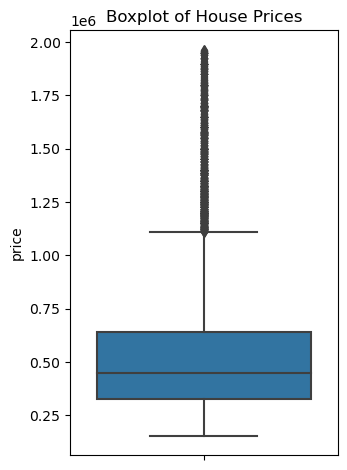

In [31]:
### Boxplot for price ###
plt.subplot(1, 2, 2)
sns.boxplot(y=df_final['price'])
plt.title('Boxplot of House Prices')

### Display the plot ###
plt.tight_layout()
plt.show()


In [32]:
print(df_final.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'price_group', 'price_per_sqft',
       'price_per_sqft_normalized', 'avg_price_per_sqft', 'age',
       'price_category'],
      dtype='object')


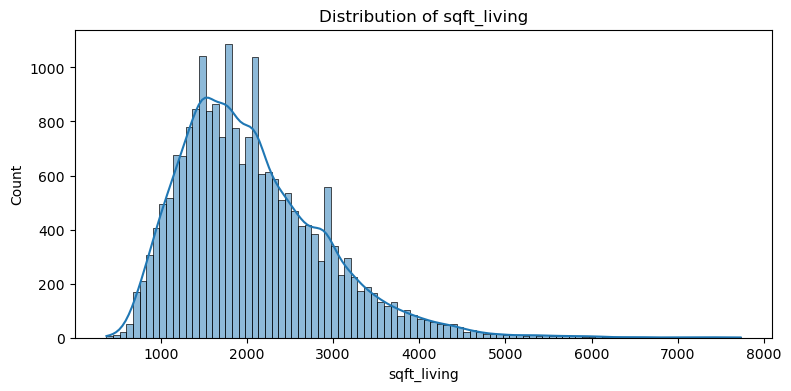

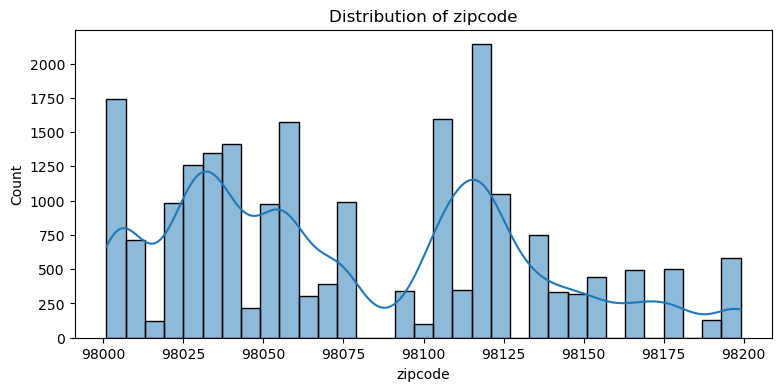

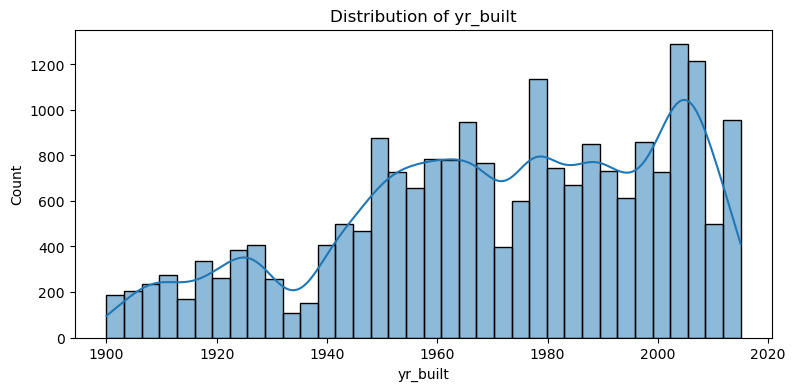

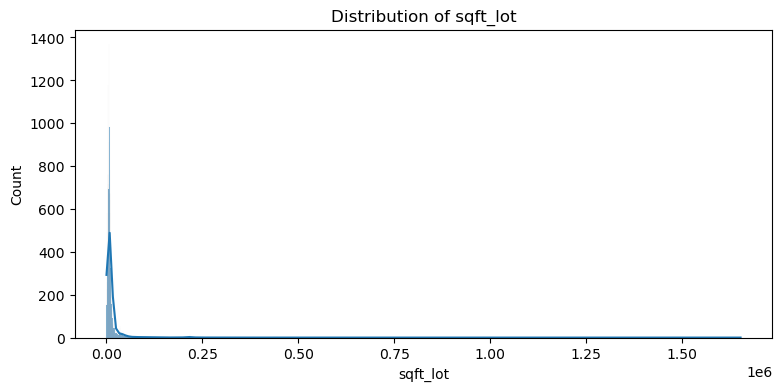

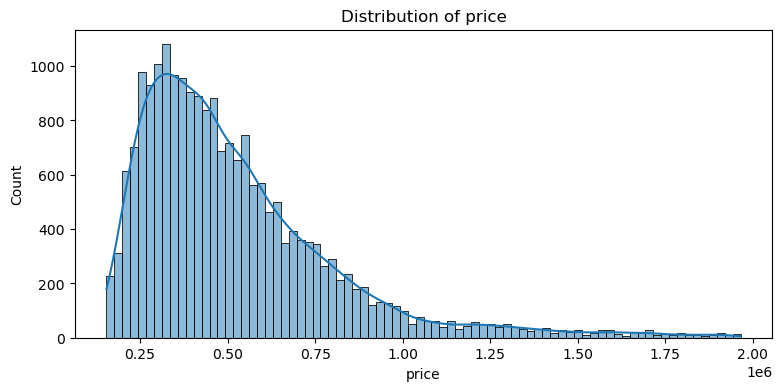

In [33]:
selected_columns = df_final[['sqft_living', 'zipcode', 'yr_built', 'sqft_lot', 'price']]

### Histograms ###
for column in selected_columns.columns:
    plt.figure(figsize=(9, 4))
    sns.histplot(selected_columns[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

## 2.3 Diagnose for correlations between variables and determine independent and dependent variables

In [34]:
### All values corr related to price ###
display(HTML("<u>Correlation with Price:</u>"))
df_final.corr()['price']

id                          -0.01
price                        1.00
bedrooms                     0.33
bathrooms                    0.51
sqft_living                  0.68
sqft_lot                     0.10
floors                       0.27
view                         0.34
sqft_above                   0.58
sqft_basement                0.28
yr_built                     0.05
yr_renovated                 0.12
zipcode                     -0.04
sqft_living15                0.60
sqft_lot15                   0.09
price_group                  0.83
price_per_sqft               0.53
price_per_sqft_normalized    0.53
avg_price_per_sqft           0.57
age                         -0.05
Name: price, dtype: float64

The next visualization is a correlation matrix heatmap, revealed key relationships between housing features. "Sqft_living" had a strong positive correlation of 0.68 with "price," indicating a big impact on price, while "Zip code" showed a negative correlation of -0.043 with "price," suggesting minimal influence. "Sqft_lot" was weakly correlated at 0.098 with "price," signifying that lot size has a minor role in price determination. 

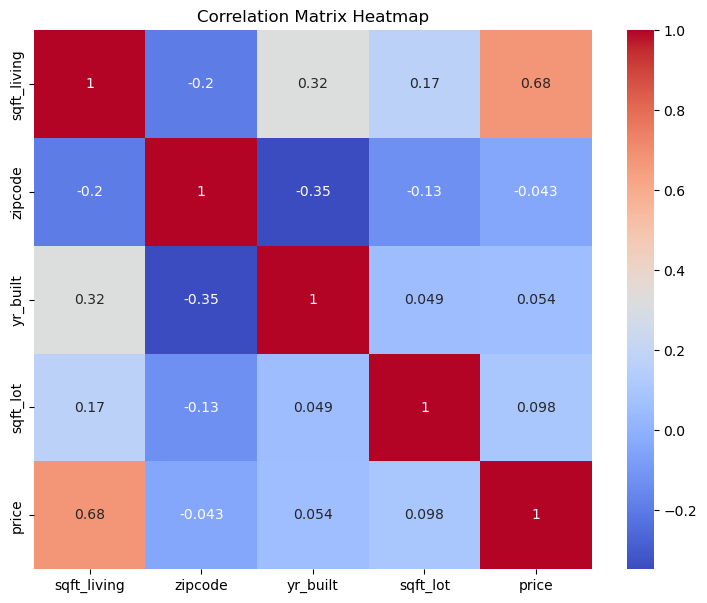

In [35]:
### Correlation matrix heatmap ###
numerical_df = selected_columns

plt.figure(figsize=(9, 7))
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

## 2.4 Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest

Lastly, the pairplot examined selected columns such as “sqft_living”, “zipcode”, “yr_built”, “sqft_lot”, and “price”. This visualization was crucial in identifying interaction patterns between pairs of variables. For example, it highlighted the relationship between the year a property was built and its price, indicating trends in values between older and modern homes. 

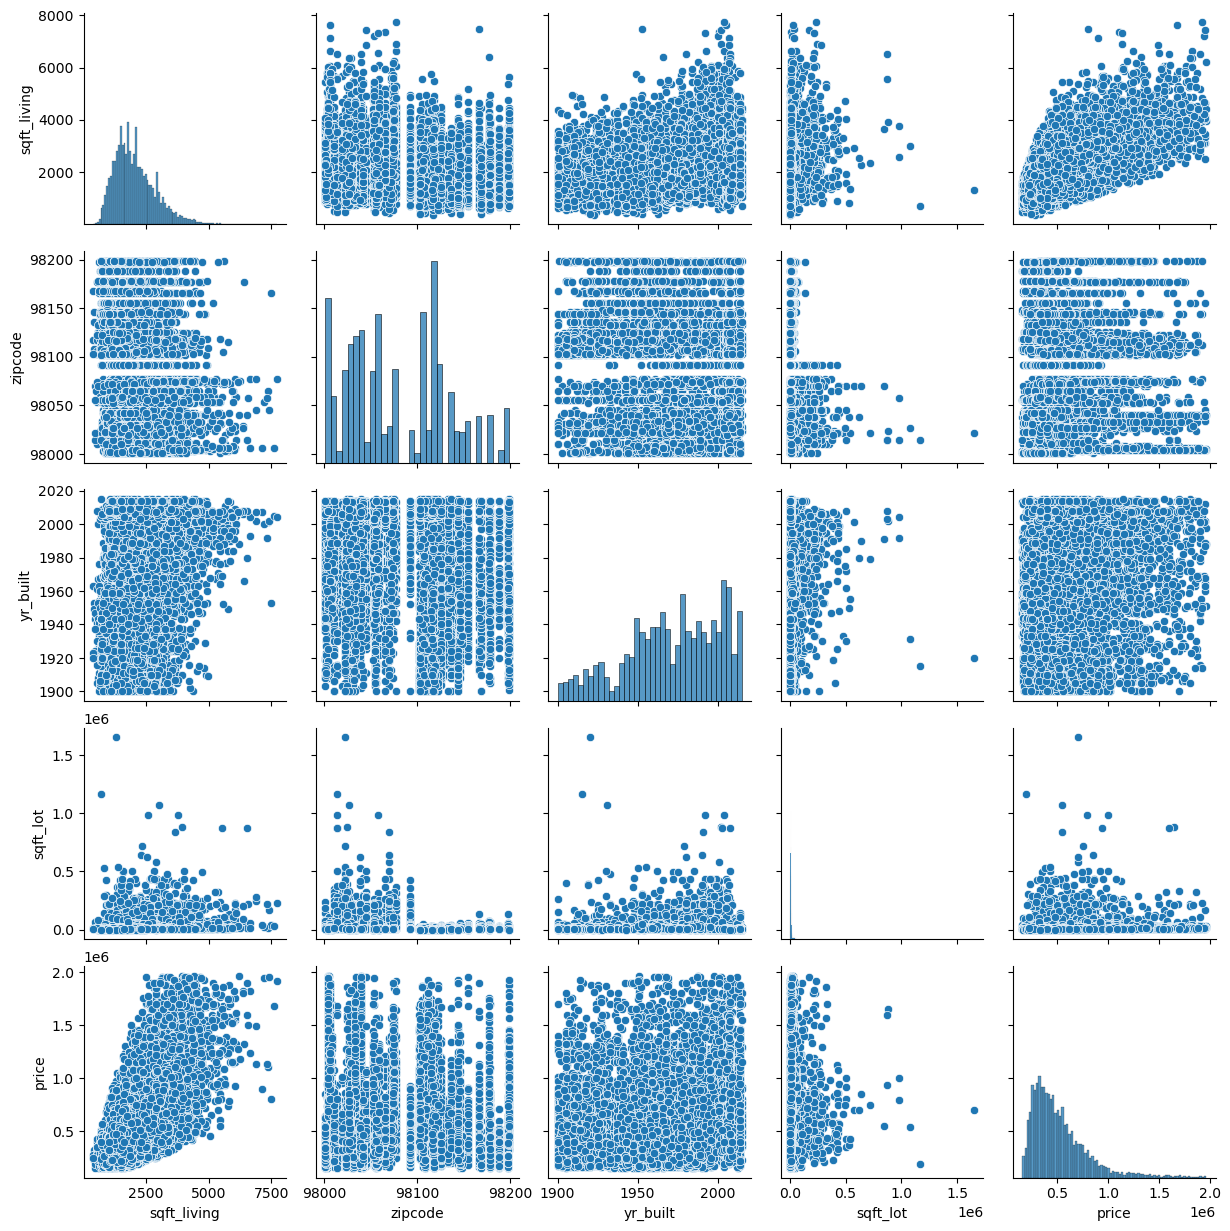

In [36]:
### pairplot for the selected columns ###
sns.pairplot(selected_columns)
plt.show()

# 3. Data Analytics
## 3.1 Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables

After comparing OLS Regression and Random Forest, our team chose to use the supervised learning method, Random Forest. The R-square values were much stronger for Random Forest which consistantly landed in the 70s range while the OLS Regression stayed in the 40s. 
By testing different variables and outcomes we chose our dependent variable (y) as 'price' while the independent variables (x) were 'sqft_living', 'zipcode', 'yr_built', 'sqft_lot'.

In [37]:
### TORI ###

###Linear Regression Option ###
###Defining Adding Constant to X(Ind) and Y(Dep)###
X1 = sm.add_constant(df_final[['sqft_living', 'zipcode', 'yr_built', 'sqft_lot']])
Y1 = df_final['price']

###linear regression model###
lr_model1 = sm.OLS(Y1, X1)

###Fit the model###
results = lr_model1.fit()

###summary statistics###
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     5111.
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:10:18   Log-Likelihood:            -2.8862e+05
No. Observations:               21167   AIC:                         5.773e+05
Df Residuals:                   21162   BIC:                         5.773e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.958e+07   2.79e+06     -7.021      

In [38]:
### Random Forest Regressor Option ###
### With help from (Koehrsen, 2017) and (Bruce et al., 2020) ####

### Data Preprocessing ###
X = df_final[['sqft_living', 'zipcode', 'yr_built', 'sqft_lot']]
y = df_final['price']

### Train-Test Split ### Random State = square root of 4 = 2 ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Train the Random Forest Model ### n_estimators was found to hit accuracy plateau at 200 ###
rf_model = RandomForestRegressor(n_estimators=200, random_state=2)
rf_model.fit(X_train, y_train)

### Predictions ###
y_pred = rf_model.predict(X_test)


## 3.2 Train, test, and provide accuracy and evaluation metrics for model results

In [39]:
### Evaluate ###
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

### Print Out ###
display(HTML("<u>Evaluation Metrics:</u>"))
print(f'Mean Squared Error: {round(mse, 3)}')
print(f'Mean Absolute Error: {round(mae, 3)}')
print(f'Root Mean Squared Error (RMSE): {round(rmse, 3)}')
print(f'R-squared (R2) Value: {round(r2, 4)}')
print(f'Explained Variance Score: {round(evs, 4)}')

### Checking variables for importance ###
feature_importances = rf_model.feature_importances_
print('\nFeature Importances:', feature_importances)


Mean Squared Error: 18294591881.409
Mean Absolute Error: 85425.553
Root Mean Squared Error (RMSE): 135257.502
R-squared (R2) Value: 0.7797
Explained Variance Score: 0.7798

Feature Importances: [0.54656616 0.24709333 0.10383298 0.10250752]


Looking at our final output, we see the Mean Absolute Error is just over 85K, meaning, on average, the absolute difference between predicted and actual prices is$85,425 dollars. In a similar fashion, the Root Mean Square Error is over 135K, meaning that our model could be off by that much. Our features of importance confirm our earlier findings that sqft living is the most significant contributor to our model, followed by zip code, year built, and sqft lot size.

With our R-squared value and Explained Variance Score at 77 percent, we are pleased with the outcome and recognize we have opportunities to improve accuracy in the future with more data and further refining our model.

Below is an example of the top section of one of our Tree plots. The random forest regression is based on applying bagging to decision trees. In this visual, the root node asks if the records are less than or equal to 2,737 sqft_living. If the answer is True, the algorithm will continue to the left side of the tree; if it is false, then it will continue to the right side of the tree. This continues until it arrives at a final prediction. The entire process will repeat on other decision trees with random variables, and then all the predictions are averaged to create a single final output.

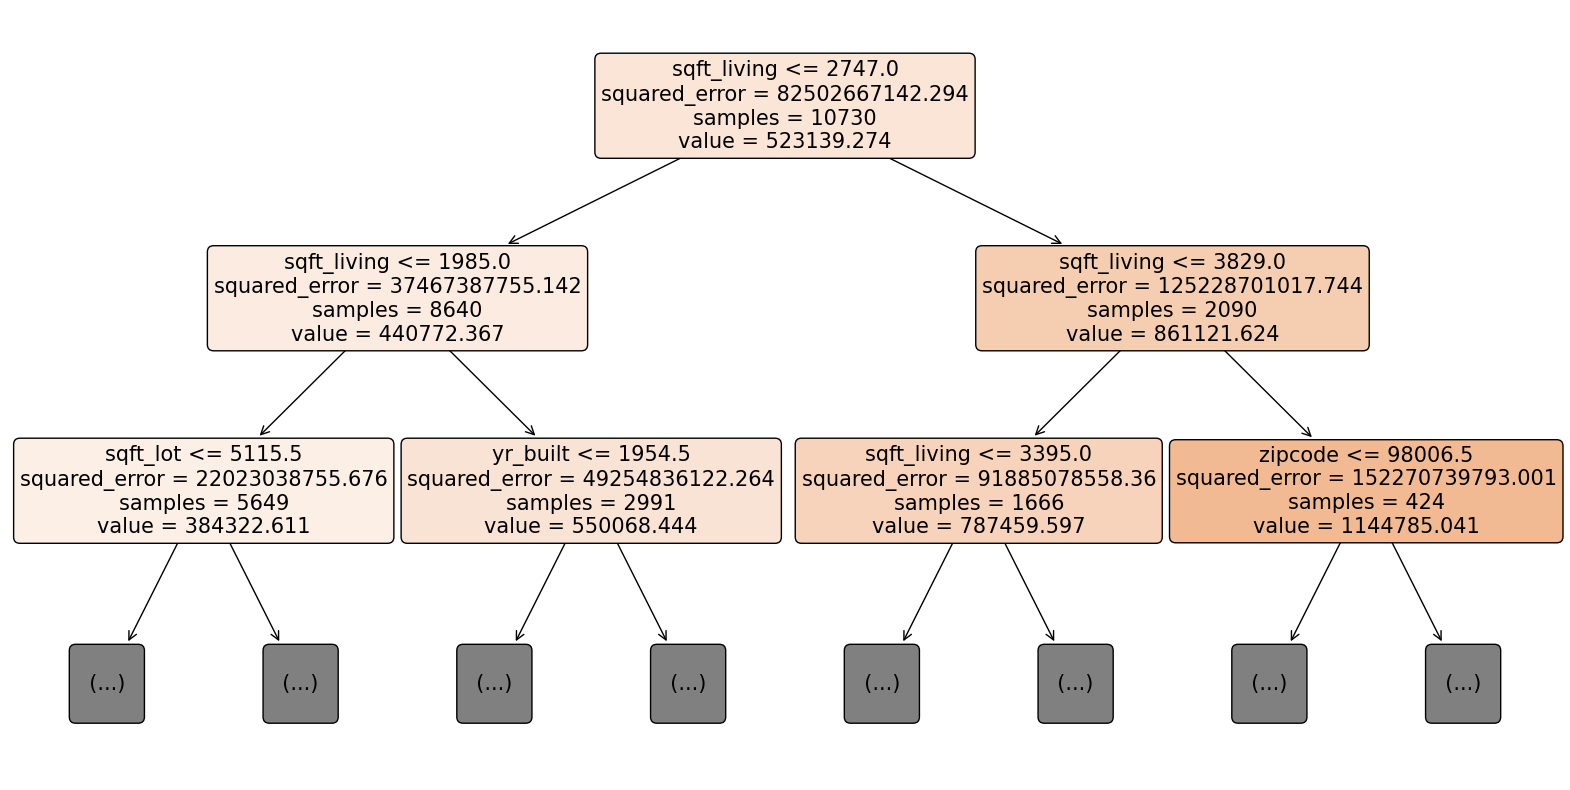

In [40]:
### With help from (Koehrsen, 2017) ####

### Tree viz option ###
tree_index = 0
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[tree_index], feature_names=X.columns, 
          filled=True, rounded=True, max_depth=2, fontsize=15)

### Print out ###
display(HTML("<u>Example of Tree:</u>"))
plt.show()


#### References
Bruce, P., Bruce, A., & Gedeck, P. (2020). Practical Statistics for Data Scientists (Second Edition ed.). O'Reilly Media, Inc.
Koehrsen, W. (2017). Random Forest in Python. Retrieved December 6,2023 from https://towardsdatascience.com/random-forest-in-python-24d0893d51c0